IMPORTANT, READ README OR JUST DOWNLOAD the TRAINING data

In [187]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
from tensorflow.keras import regularizers
import seaborn as sns
import pandas as pd

# Images and dataset exploration

Let's see what the images look like

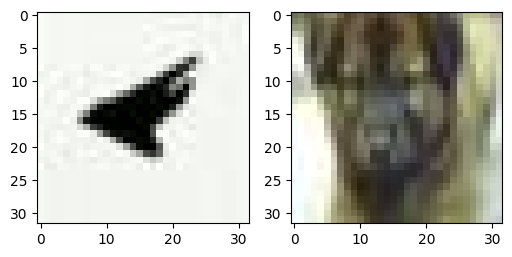

In [2]:
image1 = plt.imread('test/airplane/0002.jpg')/255
image2 = plt.imread('test/dog/0004.jpg')/255
fig, ax = plt.subplots(1,2, figsize=(6,4))
ax[0].imshow(image1)
ax[1].imshow(image2);

We are gonna use a library which allow us and is specialized with Image processing for machine learning.\
It allows us to have a dataFrame without loading all the entire images and lagging the computer

In [3]:
directory = "C:/Users/USER/Documents/AI Model/AI-Pro-1/train"
data_dir = pathlib.Path(directory).with_suffix('')

Count the images to see if everything is ok

50000


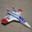

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
airplane = list(data_dir.glob('airplane/*'))
PIL.Image.open(str(airplane[1]))

Define variables

In [5]:
batch_size = 64
img_height = 32
img_width = 32

# Preprocessing

## Data splitting

Split the data from the folders

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=5,
  image_size=(img_height, img_width))

Found 50000 files belonging to 10 classes.
Using 40000 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=5,
  image_size=(img_height, img_width))

Found 50000 files belonging to 10 classes.
Using 10000 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


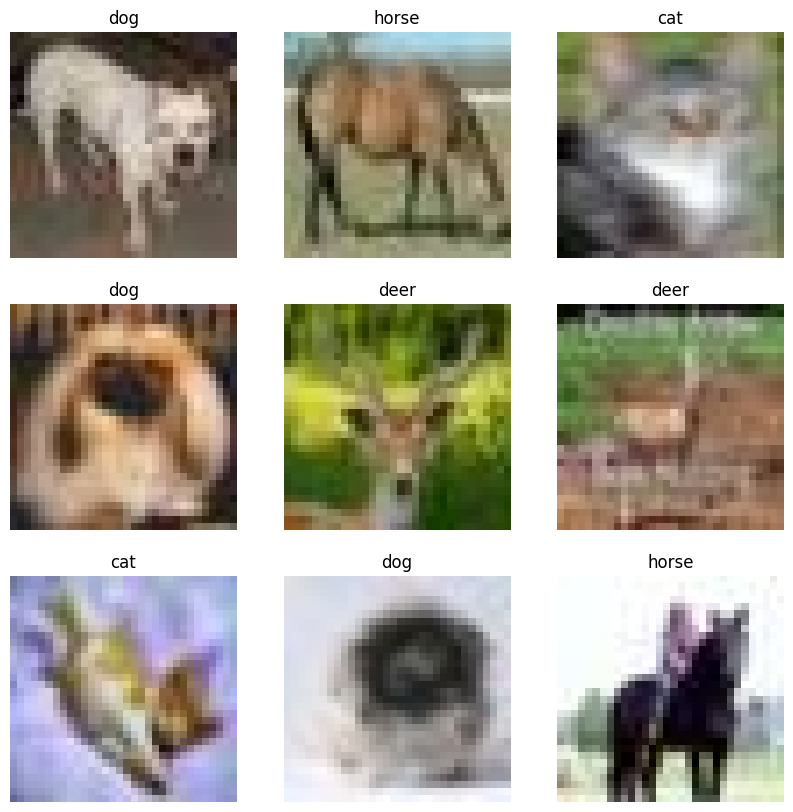

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Data scaling and normalization

Make all the values from 0 to 1

In [37]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Posprocessing

## Modeling

Ok, now its time to create the first model:\
A simplistic model, the most classic Neural Network.

<img src="nnsimple.png" alt="Simple NeuralNetwork" width="500" height="auto">

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024*3, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
    ])

In [43]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.fit(
    normalized_ds,
    validation_data=normalized_val,
    epochs=10
)

Epoch 1/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8387 - accuracy: 0.3442 - val_loss: 1.6897 - val_accuracy: 0.4074
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6521 - accuracy: 0.4156 - val_loss: 1.6288 - val_accuracy: 0.4316
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5712 - accuracy: 0.4459 - val_loss: 1.5716 - val_accuracy: 0.4523
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5110 - accuracy: 0.4684 - val_loss: 1.5586 - val_accuracy: 0.4553
Epoch 5/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.4609 - accuracy: 0.4856 - val_loss: 1.4973 - val_accuracy: 0.4810
Epoch 6/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4175 - accuracy: 0.4993 - val_loss: 1.4672 - val_accuracy: 0.4926
Epoch 7/10
1250/1250 [==============================] - 13s 11ms/step - loss: 1.3796 - accuracy: 0.5110 - val_loss: 1.5025 - val

Now, a more complex model, convultional neural network

In [164]:
num_classes = 10
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [165]:
modelCNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [166]:
modelCNN.fit(
    normalized_ds,
    epochs=15,
    validation_data=normalized_val
)

Epoch 1/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7003 - accuracy: 0.3702 - val_loss: 1.3566 - val_accuracy: 0.5085
Epoch 2/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.3227 - accuracy: 0.5250 - val_loss: 1.1509 - val_accuracy: 0.5854
Epoch 3/15
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1812 - accuracy: 0.5825 - val_loss: 1.0755 - val_accuracy: 0.6205
Epoch 4/15
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0957 - accuracy: 0.6170 - val_loss: 1.0502 - val_accuracy: 0.6381
Epoch 5/15
1250/1250 [==============================] - 16s 12ms/step - loss: 1.0237 - accuracy: 0.6406 - val_loss: 1.0399 - val_accuracy: 0.6338
Epoch 6/15
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9641 - accuracy: 0.6652 - val_loss: 0.9840 - val_accuracy: 0.6578
Epoch 7/15
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9147 - accuracy: 0.6825 - val_loss: 0.9844 - v

There is a obvious difference between them. CNN is far better against a NN. So, lets use the CNN.

## Testing

Ok, reading the predicts of the models are really a headache, so it's recommended to create a function that takes the pain for us.\
Just a simple mapping method in a function, receives the vector input, search the max value index and then from the classes return the highest.

In [149]:
def map_label(input):
    label = np.argmax(input)
    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    if label < 0 or label >= len(class_labels):
        return "Unknown"
    
    return class_labels[label]

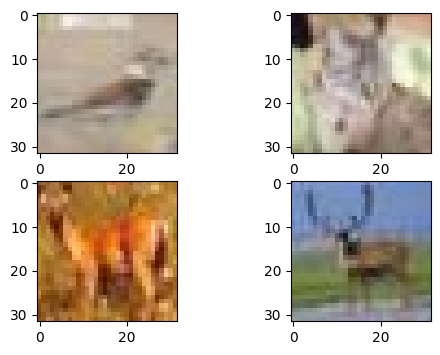

In [98]:
test_image1 = plt.imread('test/bird/0004.jpg')/255
test_image2 = plt.imread('test/cat/0001.jpg')/255
test_image3 = plt.imread('test/deer/0008.jpg')/255
test_image4 = plt.imread('test/deer/0011.jpg')/255
fig, ax = plt.subplots(2,2, figsize=(6,4))
ax[0,0].imshow(test_image1)
ax[0,1].imshow(test_image2)
ax[1,0].imshow(test_image3)
ax[1,1].imshow(test_image4)

In [167]:
map_label(modelCNN.predict(test_image1[tf.newaxis, ...]))

1/1 [==============================] - 0s 79ms/step


'deer'

In [168]:
map_label(modelCNN.predict(test_image2[tf.newaxis, ...]))

1/1 [==============================] - 0s 21ms/step


'cat'

In [169]:
map_label(modelCNN.predict(test_image3[tf.newaxis, ...]))

1/1 [==============================] - 0s 22ms/step


'deer'

In [170]:
map_label(modelCNN.predict(test_image3[tf.newaxis, ...]))

1/1 [==============================] - 0s 22ms/step


'deer'

In [171]:
results = modelCNN.evaluate(normalized_val, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 66.29%


In [172]:
image_batch, labels_batch = next(iter(normalized_val))

1/1 [==============================] - 0s 23ms/step
deer


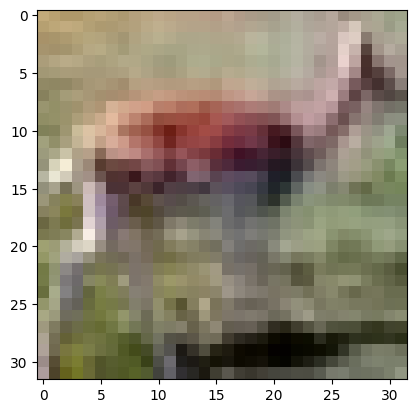

In [174]:
i = 12
plt.imshow(image_batch[i])
print(map_label(modelCNN.predict(image_batch[i][tf.newaxis, ...])))

In [185]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = np.argmax(model.predict(image_batch), axis=1)
cm = confusion_matrix(labels_batch, predictions)
clr = classification_report(labels_batch, predictions, zero_division=0)
print(clr)

1/1 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.25      0.25      0.25         4
           4       1.00      0.67      0.80         6
           5       0.40      0.50      0.44         4
           6       0.75      0.75      0.75         4
           7       1.00      0.67      0.80         3
           8       0.20      0.50      0.29         2
           9       1.00      0.50      0.67         2

    accuracy                           0.50        32
   macro avg       0.53      0.42      0.45        32
weighted avg       0.64      0.50      0.54        32



In [186]:
sum = 0
for predict in predictions:
    if predict == labels_batch.numpy()[predict]:
        sum += 1
print(sum/len(predictions))

0.34375


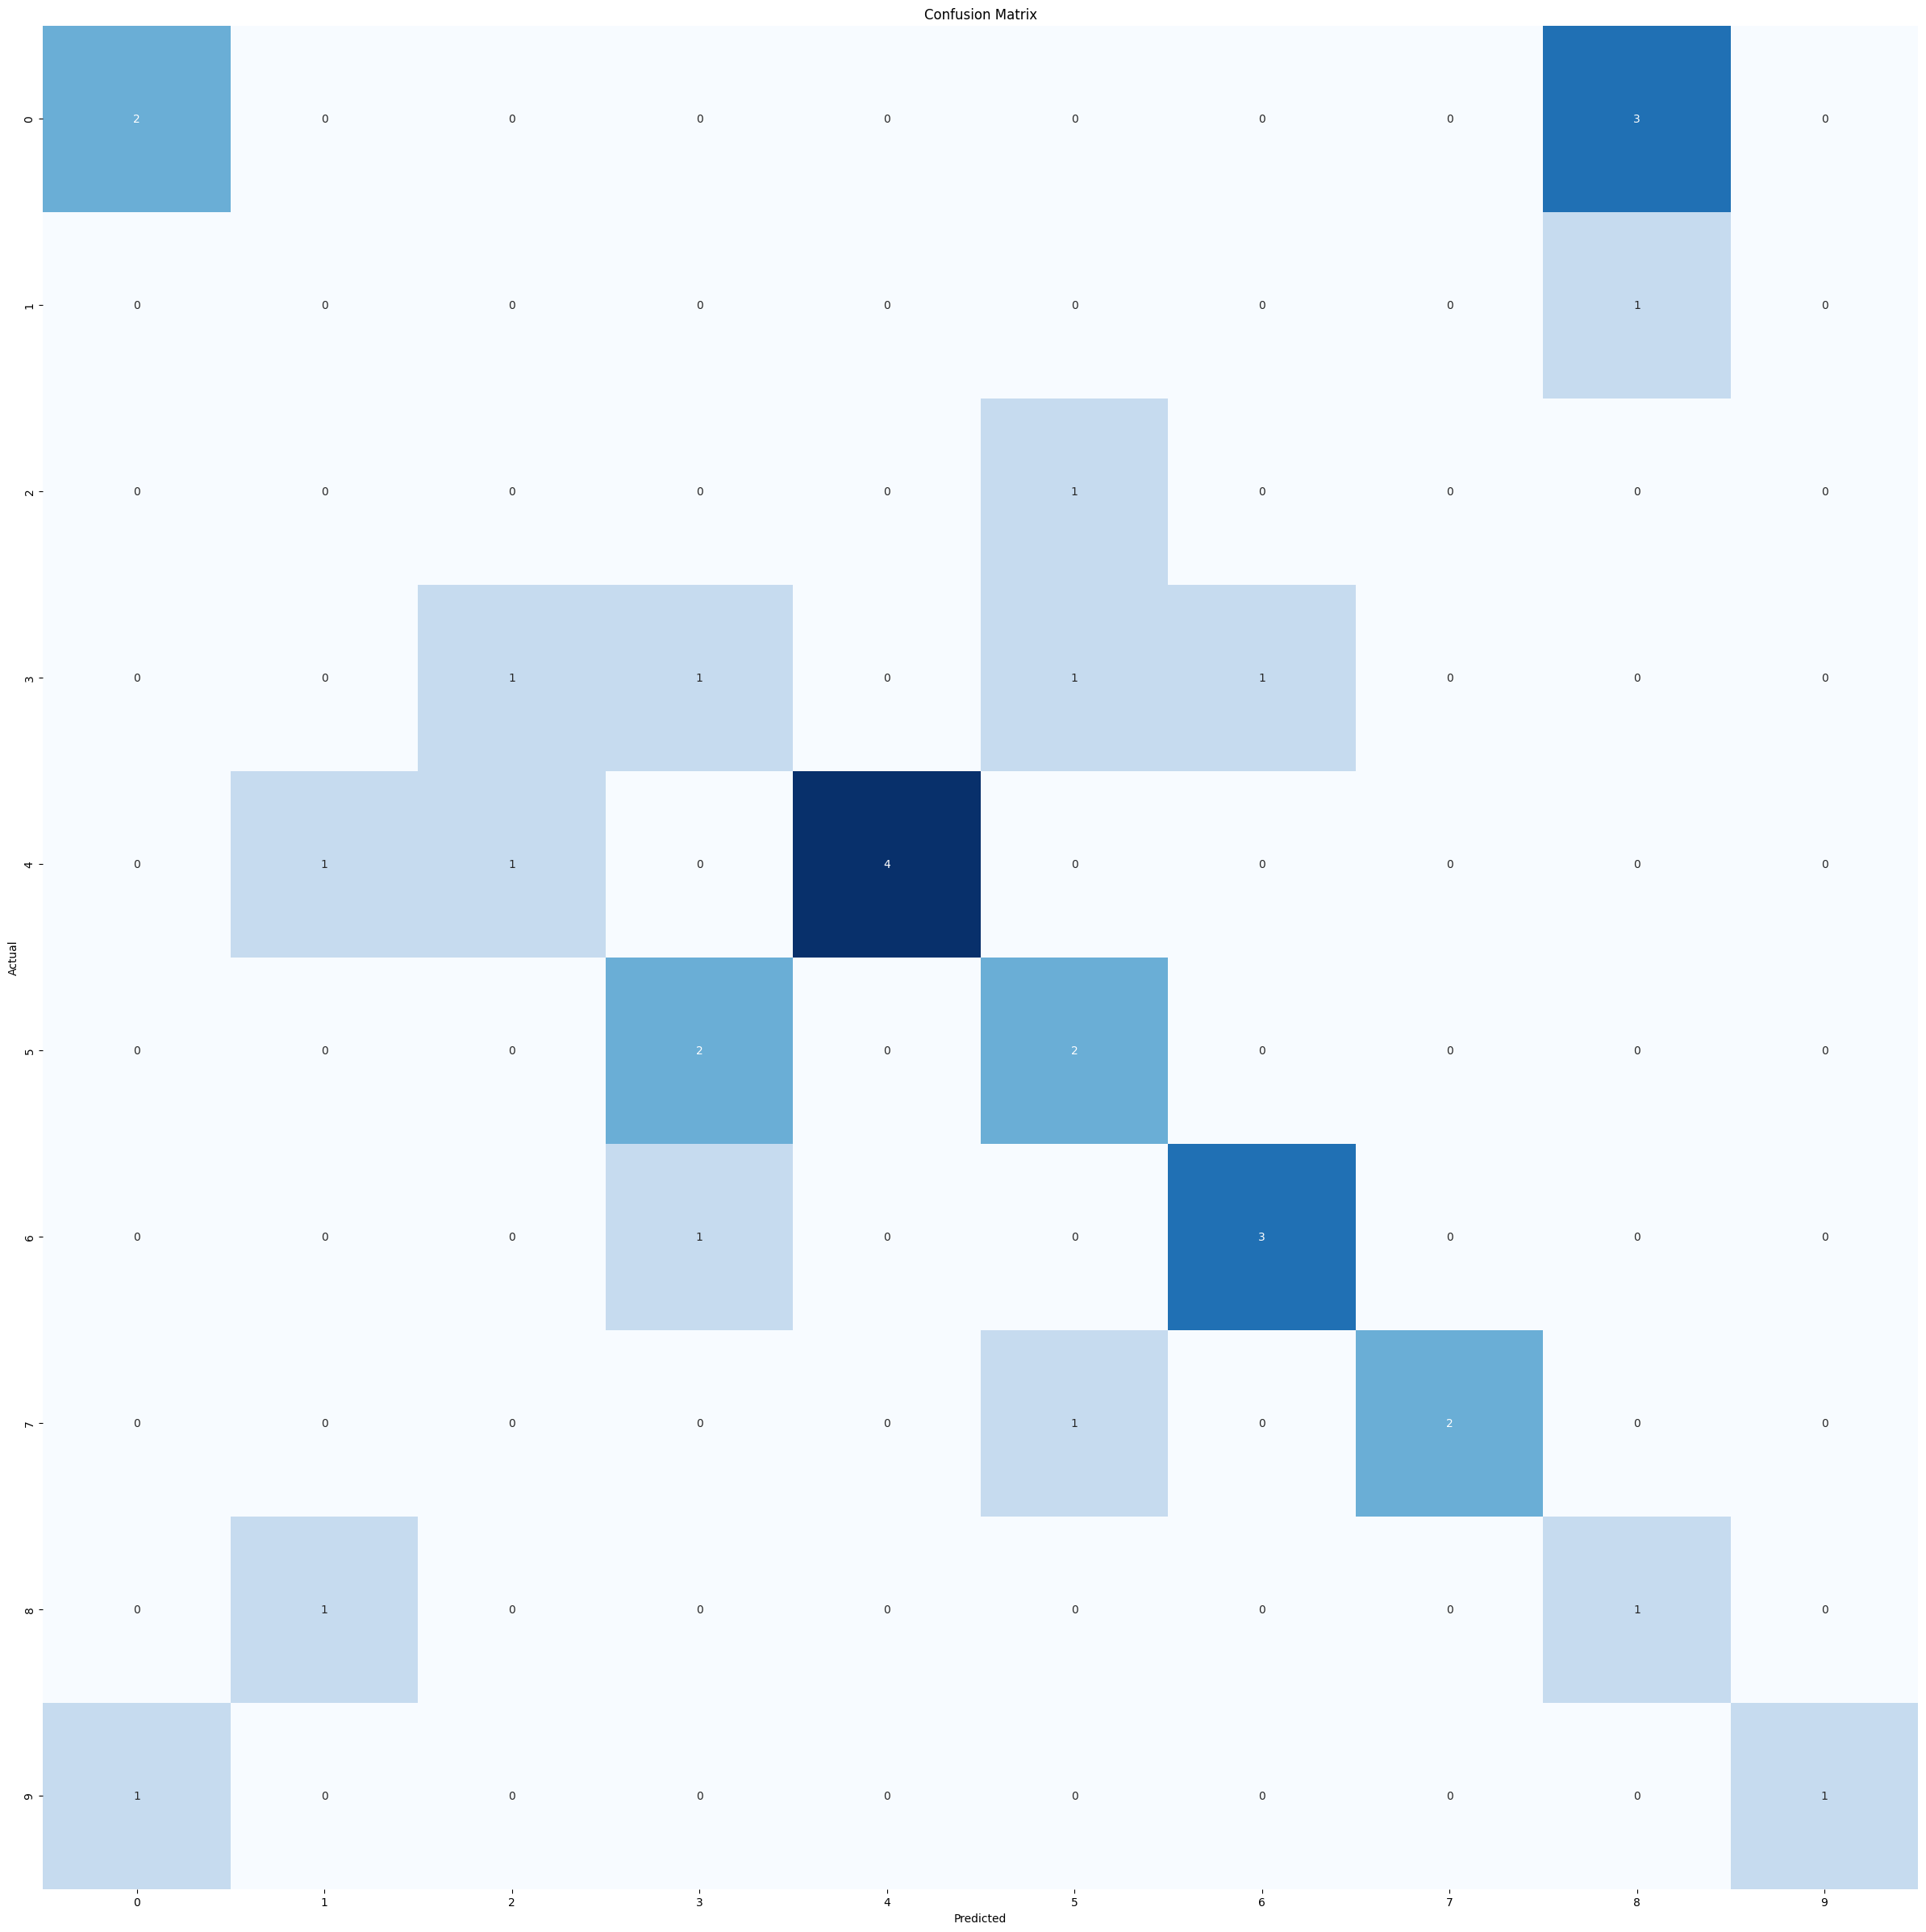

In [181]:
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 21ms/step


'frog'

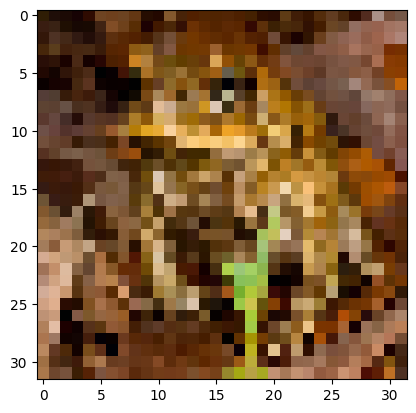

In [182]:
test_image5 = tf.image.resize(plt.imread('sapo.jpg')/255, [32,32])
plt.imshow(test_image5)
map_label(modelCNN.predict(test_image5[tf.newaxis, ...]))

1/1 [==============================] - 0s 21ms/step


'truck'

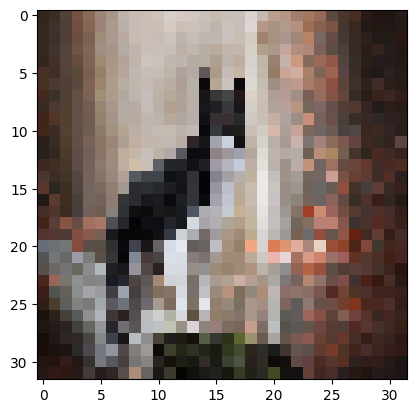

In [183]:
test_image6 = tf.image.resize(plt.imread('dog.jpg')/255, [32,32])
plt.imshow(test_image6)
map_label(modelCNN.predict(test_image6[tf.newaxis, ...]))

1/1 [==============================] - 0s 20ms/step


'cat'

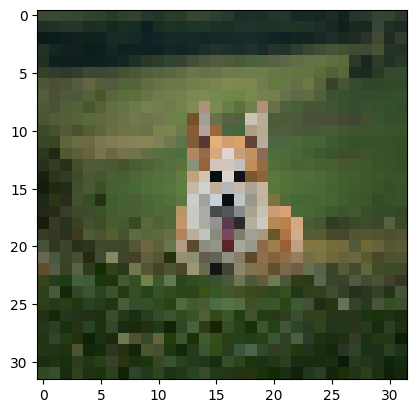

In [184]:
test_image7 = tf.image.resize(plt.imread('dog2.jpg')/255, [32,32])
plt.imshow(test_image7)
map_label(modelCNN.predict(test_image7[tf.newaxis, ...]))

Since, it is my first CNN and work alone, without much training data and techniques, I think it is a pretty good number to achieve around 40% of efficiency.\
Also is important to notice that the CNN misses around near objects, for example, a cat and dog from far, an airplane and a boat.